MAE (XGBoost): 589.8181396484375
R² Score (XGBoost): 0.9653909802436829


C:\Users\Shanmathy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


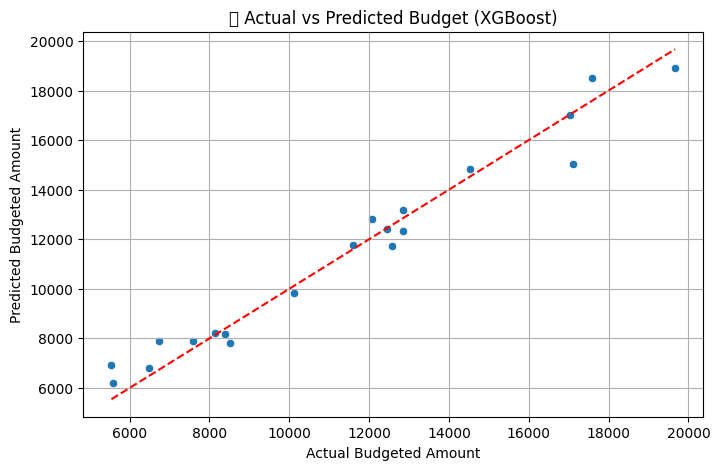

Suggested Budget for september 2024 : ₹ 10686.82


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

# Load data
df = pd.read_csv("Budget_Spending_Data_Modified5.csv")

# Convert Month if needed
if df["Month"].dtype == 'object':
    df["Month"] = pd.to_datetime(df["Month"], format='%b').dt.month

# Add useful feature
df["Spending Ratio"] = df["Actual Spending"] / df["Budgeted Amount"]

# Feature and target selection
X = df[["Month", "Year", "Actual Spending", "Spending Ratio"]]
y = df["Budgeted Amount"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)

# Visualize
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Budgeted Amount")
plt.ylabel("Predicted Budgeted Amount")
plt.title("📈 Actual vs Predicted Budget (XGBoost)")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()

# Define the actual spending value once
actual_spending_value = 10000

# Create the input data using that variable
input_data = pd.DataFrame({
    "Month": [9],
    "Year": [2024],
    "Actual Spending": [actual_spending_value],
    "Spending Ratio": [actual_spending_value / df["Budgeted Amount"].mean()]
})

predicted_budget = model.predict(input_data)
print("Suggested Budget for september 2024 : ₹", round(predicted_budget[0], 2))



In [8]:
print("Average Budgeted Amount:", df["Budgeted Amount"].mean())


Average Budgeted Amount: 12551.02
